### Cálculo Numérico | 2021.2 | Gabriele Jandres | 119159948

#### Exercício 2.1 | Método de Newton

In [1]:
# Função que obtivemos por meio de manipulação algébrica para usar o método de Newton para calcular raiz cúbica de 43
f(x) = x^3 - 43

f (generic function with 1 method)

In [2]:
# Derivada da função f
g(x) = 3x^2

g (generic function with 1 method)

In [3]:
# Função iterativa com o método de Newton para calcular aproximações de funções

# -- Parâmetros --
# iteracoes - o numero de iterações que o usuário deseja para aumentar a precisão
# chute - o chute inicial necessário para o método
# funcao - a função obtida com a manipulação da equação original
# derivada - a derivada da função anterior

function newton(iteracoes, chute, funcao, derivada) 
    for i=1:iteracoes
        chute = chute - (funcao(chute) / derivada(chute)) # atualiza o chute utilizando a formula do metodo de newton
    end
    return chute
end

newton (generic function with 1 method)

In [4]:
newton(1, 4, f, g)

3.5625

In [5]:
newton(2, 4, f, g)

3.504373140453473

In [6]:
# chute inicial problemático
newton(1, 0, f, g)

Inf

#### Exercício 4.4 

In [7]:
# Iteração para cálculo do erro do teorema de Taylor

for n = 1:30
    erro = abs((0.5) ^ (n + 1) / (n + 1))
    println("Termos: ", n, " | Erro -> ", erro)
end

Termos: 1 | Erro -> 0.125
Termos: 2 | Erro -> 0.041666666666666664
Termos: 3 | Erro -> 0.015625
Termos: 4 | Erro -> 0.00625
Termos: 5 | Erro -> 0.0026041666666666665
Termos: 6 | Erro -> 0.0011160714285714285
Termos: 7 | Erro -> 0.00048828125
Termos: 8 | Erro -> 0.00021701388888888888
Termos: 9 | Erro -> 9.765625e-5
Termos: 10 | Erro -> 4.438920454545455e-5
Termos: 11 | Erro -> 2.0345052083333332e-5
Termos: 12 | Erro -> 9.390024038461539e-6
Termos: 13 | Erro -> 4.359654017857143e-6
Termos: 14 | Erro -> 2.0345052083333333e-6
Termos: 15 | Erro -> 9.5367431640625e-7
Termos: 16 | Erro -> 4.4878791360294117e-7
Termos: 17 | Erro -> 2.1192762586805554e-7
Termos: 18 | Erro -> 1.0038677014802631e-7
Termos: 19 | Erro -> 4.76837158203125e-8
Termos: 20 | Erro -> 2.270653134300595e-8
Termos: 21 | Erro -> 1.0837208140980114e-8
Termos: 22 | Erro -> 5.183012589164402e-9
Termos: 23 | Erro -> 2.483526865641276e-9
Termos: 24 | Erro -> 1.1920928955078125e-9
Termos: 25 | Erro -> 5.73121584378756e-10
Termos:

#### Exercício 4.5 | Polinomial de Taylor para calcular ln(x)

In [8]:
# Função para calcular a expansão em série de Taylor para ln(x) com erro determinado (usando ln do Julia que pode gerar imprecisão)

# x - número que desejamos calcular
# erro - ordem do erro desejado

function ln_taylor_v1(x, erro)
    soma = 0.0
    k = 1
    while abs(log(x) - soma) >= erro # nessa versão, o erro está sendo calculado usando a diferença do ln do Julia e a aproximação
        soma += (((-1) ^ (k - 1)) * ((x - 1) ^ k)) / k # parcela do teorema de taylor
        k += 1
    end
    return soma
end

ln_taylor_v1 (generic function with 1 method)

In [9]:
# [Versão oficial] Função para calcular a expansão em série de Taylor para ln(x) com erro determinado (usando erro do teorema de Taylor)

# x - número que desejamos calcular
# erro - ordem do erro desejado

function ln_taylor_v2(x, erro)
    soma = 0.0
    a = 1
    n = 0
    M = factorial(big(n)) # o limite superior da derivada de ordem n+1 será |(-1)^(n) * (n)! / x^(n+1))|, mas como x = 1 e é módulo, pode ficar apenas o fatorial
    while abs(M * (x - a) ^ (n + 1) / factorial(big(n + 1))) >= erro # nessa versão, o erro está sendo calculado usando o erro do teorema de Taylor
        soma += (((-1) ^ (n)) * ((x - 1) ^ (n + 1))) / (n + 1) # parcela do teorema de taylor
        n += 1
        M = factorial(big(n))
    end
    # println("Termos ", n)
    return soma
end

ln_taylor_v2 (generic function with 1 method)

In [10]:
# versão com simplificação dos fatoriais para exigir menos processamento, sobra um (n + 1) no denominador
function ln_taylor_v3(x, erro)
    soma = 0.0
    a = 1
    n = 0
    while abs((x - a) ^ (n + 1) / (n + 1)) >= erro # nessa versão, o erro está sendo calculado usando o erro do teorema de Taylor
        soma += (((-1) ^ (n)) * ((x - 1) ^ (n + 1))) / (n + 1) # parcela do teorema de taylor
        n += 1
    end
    # println("Termos ", n)
    return soma
end

ln_taylor_v3 (generic function with 1 method)

In [11]:
ln_taylor_v1(1.5, 1e-8)

0.4054651154407084

In [12]:
ln_taylor_v2(1.5, 1e-8)

0.40546510460350027

In [13]:
ln_taylor_v3(1.5, 1e-8)

0.40546510460350027

#### Exercício 4.7 | Exercício de Arte

In [14]:
using Plots

In [15]:
gr()

Plots.GRBackend()

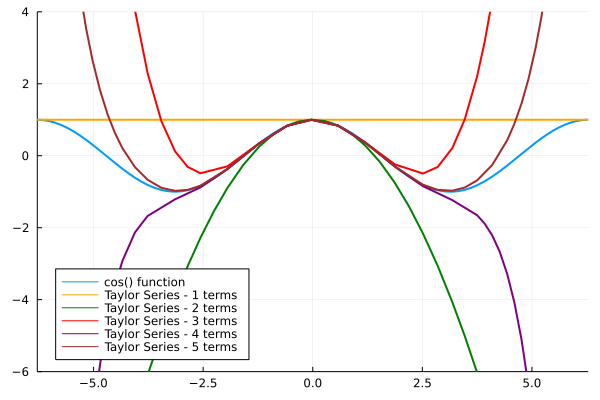

In [16]:
f(x) = cos.(x)

plot(f, -2*π, 2*π,
    lw=2,
    lab="cos() function",
    legend=:bottomleft
)
xlims!(-2*π, 2*π)
ylims!(-6, 4)

# Taylor para cosseno: sum (-1)^n * x^(2n)/(factorial(2n))

# Taylor 1 termo
f(x) = 1 

plot!(f, -2*π, 2*π,
    lw=2,
    lab="Taylor Series - 1 terms",
    color=:orange
)

# Taylor 2 termos
f(x) = 1 - x^2/factorial(2)

plot!(f, -2*π, 2*π,
    lw=2,
    lab="Taylor Series - 2 terms",
    color=:green
)

# Taylor 3 termos
f(x) = 1 - x^2/factorial(2) + x^4/factorial(4) 

plot!(f, -2*π, 2*π,
    lw=2,
    lab="Taylor Series - 3 terms",
    color=:red
)

# Taylor 4 termos
f(x) = 1 - x^2/factorial(2) + x^4/factorial(4) - x^6/factorial(6) 

plot!(f, -2*π, 2*π,
    lw=2,
    lab="Taylor Series - 4 terms",
    color=:purple
)

# Taylor 5 termos
f(x) = 1 - x^2/factorial(2) + x^4/factorial(4) - x^6/factorial(6) + x^8/factorial(8)

plot!(f, -2*π, 2*π,
    lw=2,
    lab="Taylor Series - 5 terms",
    color=:brown
)